<a href="https://colab.research.google.com/github/livingMabhijit/time_series/blob/master/msft_timeseries_lstm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import yfinance as yf
#ticker symbol for specific stock name
tickerSymbol = 'MSFT'
ticker_data = yf.Ticker(tickerSymbol)
ticker_df = ticker_data.history(period='1d',start='2010-01-01',end='2020-04-01')
df1 = ticker_df.reset_index()['Close']




In [0]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))
df1= scaler.fit_transform(np.array(df1).reshape(-1,1))

In [4]:
#pip install yfinance

  Created wheel for yfinance: filename=yfinance-0.1.54-py2.py3-none-any.whl size=22409 sha256=1a16ff172ed7b5c5c431d5ecadcb3369753dfe2afa83c6d5fe61120a65d0867a
  Stored in directory: /root/.cache/pip/wheels/f9/e3/5b/ec24dd2984b12d61e0abf26289746c2436a0e7844f26f2515c
Successfully built yfinance


In [0]:
train_size = int(len(df1)*0.70)
test_size = len(df1)-train_size
train_data, test_data= df1[0:train_size,:],df1[train_size:len(df1),:1]

In [0]:
def create_dataset(ds, timestep =1):
    dataX,dataY=[],[]
    for i in range(len(ds)-timestep-1):
        a = ds[i:(i+timestep),0]
        dataX.append(a)
        dataY.append(ds[i+timestep,0])
    return np.array(dataX),np.array(dataY)

In [0]:
timestep = 100
x_train,y_train = create_dataset(train_data,timestep)
x_test,y_test = create_dataset(test_data,timestep)
x_train = x_train.reshape(x_train.shape[0],x_train.shape[1],1)
x_test = x_test.reshape(x_test.shape[0],x_test.shape[1],1)

In [13]:
x_train.shape

(1703, 100, 1)

In [14]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

model = Sequential()
model.add(LSTM(80,return_sequences = True,input_shape =(100,1)))
model.add(Dropout(0.2))
model.add(LSTM(40,return_sequences = True))
model.add(Dropout(0.2))
model.add(LSTM(20))
model.add(Dropout(0.2))
model.add(Dense(1))
model.compile(loss = 'mean_squared_error', optimizer = 'adam', metrics=['accuracy'])

model.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=100,batch_size=65,verbose=1)

Train on 1703 samples, validate on 673 samples
Epoch 1/100
1703/1703 [==============================] - 14s 8ms/step - loss: 0.0020 - accuracy: 5.8720e-04 - val_loss: 0.0044 - val_accuracy: 0.0015
Epoch 2/100
1703/1703 [==============================] - 13s 8ms/step - loss: 3.8922e-04 - accuracy: 5.8720e-04 - val_loss: 0.0027 - val_accuracy: 0.0015
Epoch 3/100
1703/1703 [==============================] - 13s 8ms/step - loss: 3.2330e-04 - accuracy: 5.8720e-04 - val_loss: 0.0018 - val_accuracy: 0.0015
Epoch 4/100
1703/1703 [==============================] - 13s 8ms/step - loss: 2.9144e-04 - accuracy: 5.8720e-04 - val_loss: 0.0017 - val_accuracy: 0.0015
Epoch 5/100
1703/1703 [==============================] - 13s 8ms/step - loss: 2.5372e-04 - accuracy: 5.8720e-04 - val_loss: 0.0038 - val_accuracy: 0.0015
Epoch 6/100
1703/1703 [==============================] - 13s 8ms/step - loss: 2.5992e-04 - accuracy: 5.8720e-04 - val_loss: 0.0026 - val_accuracy: 0.0015
Epoch 7/100
1703/1703 [==========

In [0]:
train_predict=model.predict(x_train)
test_predict=model.predict(x_test)

In [0]:
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [18]:
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

35.747322582325204

In [20]:
math.sqrt(mean_squared_error(y_test,test_predict))

112.10795377237037

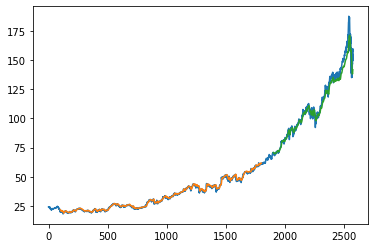

In [23]:
import matplotlib.pyplot as plt

look_back=100
trainPredictPlot = np.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = np.empty_like(df1)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [24]:
# lets see some test data
len(test_data)

774

In [25]:
x_input=test_data[674:].reshape(1,-1)
x_input.shape

(1, 100)

In [0]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [28]:
from numpy import array

lst_output=[]
n_steps=100
i=0
while(i<30):
    
    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
    

print(lst_output)

[0.75621074]
101
1 day input [0.73637007 0.74634175 0.74716781 0.75283219 0.75418928 0.75861459
 0.76976634 0.77194949 0.77224451 0.77071041 0.76988435 0.7705334
 0.78015105 0.78481237 0.78652348 0.78103611 0.77029738 0.76888128
 0.7720675  0.77253953 0.78321926 0.7809181  0.77956101 0.78292424
 0.79195185 0.79950437 0.80540477 0.80044843 0.7985603  0.80640784
 0.81643852 0.81643852 0.81626151 0.82381402 0.82552514 0.81744159
 0.81809063 0.8352608  0.823519   0.82593816 0.81738258 0.83213359
 0.84387538 0.83945008 0.85083786 0.8441114  0.85024782 0.86783101
 0.87325938 0.86977814 0.86505782 0.87101723 0.86116356 0.84499646
 0.86364173 0.87880576 0.90659665 0.89160963 0.91597829 0.94966958
 0.94837149 0.97026198 0.97179608 1.         0.9750413  0.97663441
 0.97073401 0.98035166 0.99138541 0.99468964 0.9778735  0.94353316
 0.89827708 0.88163795 0.89402879 0.82346    0.84599953 0.90942884
 0.86069153 0.89627095 0.87107623 0.84340335 0.77897097 0.83956809
 0.79667217 0.71093934 0.82729526 

In [0]:
day_new=np.arange(1,101)
day_pred=np.arange(101,131)

In [30]:
len(df1)

2578

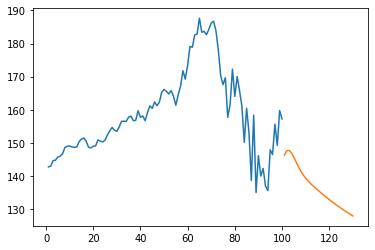

In [31]:
plt.plot(day_new,scaler.inverse_transform(df1[2478:]))
plt.plot(day_pred,scaler.inverse_transform(lst_output))

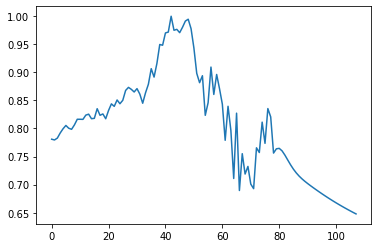

In [33]:
df2=df1.tolist()
df2.extend(lst_output)
plt.plot(df2[2500:])

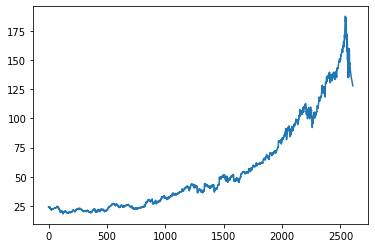

In [34]:
df2=scaler.inverse_transform(df2).tolist()
plt.plot(df2)